In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost
import pickle
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef, roc_auc_score, average_precision_score,roc_curve, confusion_matrix,plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import tensorflow as tf
from sklearn.inspection import permutation_importance

ImportError: DLL load failed while importing _imaging: The specified module could not be found.

In [2]:
udp_df = pd.read_csv("./dataset.csv",index_col=0)

In [3]:
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [4]:
udp_df["service"].value_counts()

private     23176
domain_u     3160
other         286
ntp_u          80
tftp_u          1
Name: service, dtype: int64

In [5]:
def check_service(service):
    serv = []
    for i in service:
        if i=="private":
            ser = 0.0
            serv.append(ser)
        elif i=="domain_u":
            ser = -0.3
            serv.append(ser)
        elif i=="other":
            ser = -0.1
            serv.append(ser)
        elif i=="ntp_u":
            ser = -0.2
            serv.append(ser)
        else:
            ser = 0.1
            serv.append(ser)

    return serv
    
udp_df["service"] = check_service(udp_df["service"])
udp_df["service"].value_counts()

 0.0    23176
-0.3     3160
-0.1      286
-0.2       80
 0.1        1
Name: service, dtype: int64

In [6]:
udp_df["service"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
311024    0.0
311025    0.0
311026    0.0
311027    0.0
311028    0.0
Name: service, Length: 26703, dtype: float64

In [7]:
udp_df["count"]

0         1
1         1
2         1
3         2
4         2
         ..
311024    2
311025    4
311026    2
311027    4
311028    2
Name: count, Length: 26703, dtype: int64

In [8]:
service_values = np.unique(udp_df.loc[:,"service"])
print(service_values)
mid = (len(service_values)+1)/2
print(mid)
for i in range(len(service_values)):
    udp_df = udp_df.replace(service_values[i], (i-mid)/10)

def check_service(df):
    mid = 3
    df


[-0.3 -0.2 -0.1  0.   0.1]
3.0


In [9]:
udp_df["service"].value_counts()

 0.0    23176
-0.3     3160
-0.1      286
-0.2       80
 0.1        1
Name: service, dtype: int64

In [10]:
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [11]:
#I will be extracting all the important features as a "priori" for preprocessing
features = ["service","src_bytes","dst_bytes","wrong_fragment","count","num_compromised","srv_count","dst_host_srv_count","dst_host_diff_srv_rate"]
target = "result"

In [12]:
X = udp_df.loc[:,features]
y = udp_df.loc[:,target]

In [13]:
classes = np.unique(y)
print(classes)

['multihop.' 'normal.' 'saint.' 'satan.' 'snmpgetattack.' 'snmpguess.'
 'teardrop.' 'udpstorm.']


In [14]:
#replacing all classes of attack with 1 and normal result with 0 in our icmp_df
for i in range(len(classes)):
    if i == 1:
        udp_df = udp_df.replace(classes[i], 0)
    else:
        udp_df = udp_df.replace(classes[i], 1)

#turning the service attribute to categorical values
udp_df=udp_df.replace("eco_i",-0.1)
udp_df=udp_df.replace("ecr_i",0.0)
udp_df=udp_df.replace("tim_i",0.1)
udp_df=udp_df.replace("urp_i",0.2)

In [15]:
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
1,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1


[]

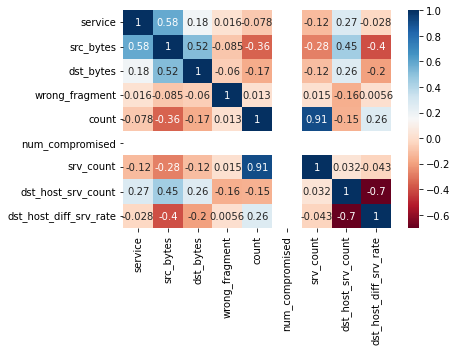

In [16]:
#I selected certain features but I will have to find some covariance between them so I will plot a covariance heatmap
sns.heatmap(X.corr(), annot=True,cmap="RdBu")
plt.plot()
#the data as seen is highly uncorrelated as most of it is one valued such as the duration one.

In [18]:
y = udp_df.loc[:,target]

In [17]:
y.to_csv("y")

In [18]:
#updated feature selection to release overfitting and accuracy improvement
#in generalised prediction

X.to_csv("X")

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

C:\Users\harsh\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:00:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\harsh\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.035969
0:	learn: 0.6575052	total: 166ms	remaining: 2m 46s
1:	learn: 0.6232043	total: 189ms	remaining: 1m 34s
2:	learn: 0.5986723	total: 198ms	remaining: 1m 5s
3:	learn: 0.5709123	total: 207ms	remaining: 51.5s
4:	learn: 0.5463494	total: 237ms	remaining: 47.2s
5:	learn: 0.5291258	total: 254ms	remaining: 42s
6:	learn: 0.5094589	total: 267ms	remaining: 37.8s


findfont: Font family ['Calbri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Agency'] not found. Falling back to DejaVu Sans.


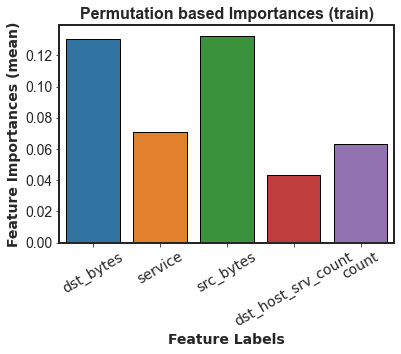

In [23]:
level0 = list()
level0.append(('rf_clf', RandomForestClassifier()))
level0.append(('ext_clf', ExtraTreesClassifier()))
level0.append(('xgb_clf', xgboost.XGBClassifier()))
level0.append(('lgb_clf', LGBMClassifier()))
level0.append(('ada_clf', AdaBoostClassifier()))
level1 = CatBoostClassifier()
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=2)
model.fit(X_train, y_train)
import matplotlib
sns.set_style('ticks')
matplotlib.rcParams['axes.linewidth'] = 2
result = permutation_importance(model, X_train, y_train, n_repeats=1,
                                random_state=0)
plt.figure(figsize=(6,4))
sns.barplot(x=X.columns, y=result.importances_mean, edgecolor = "black")
plt.title('Permutation based Importances (train)', fontsize=16, fontweight="bold")
plt.xlabel('Feature Labels', fontsize=14, fontweight="bold", fontname="Agency")
plt.ylabel('Feature Importances (mean)', fontsize=14, fontweight="bold", fontname="Agency")
plt.xticks(fontsize=14, rotation=30, fontname="Calbri")

plt.yticks(fontsize=14)
plt.show()

In [24]:
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

In [25]:
with open('model_pkl' , 'rb') as f:
    model = pickle.load(f)
y_pred = model.predict(X_test)

C:\Users\harsh\AppData\Roaming\Python\Python39\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


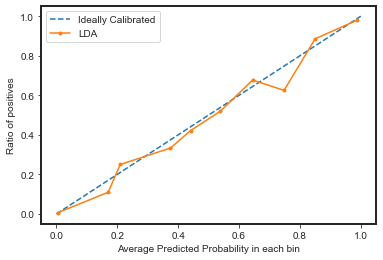

In [26]:
from sklearn.calibration import calibration_curve

prob = model.predict_proba(X_test)[:, 1]
 
# Creating Calibration Curve
x, y = calibration_curve(y_test, prob, n_bins = 10, normalize = True)
 
# Plot calibration curve
 
# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
 
# Plot model's calibration curve
plt.plot(y, x, marker = '.', label = 'LDA')
 
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [27]:
def eval_metrics(y_pred, y_test):
    y_pred=model.predict(X_test)
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred, average='macro'))
    print("Precision : ", precision_score(y_test, y_pred, average='macro'))
    print("F-1 score : ", f1_score(y_test, y_pred, average='macro'))
    print("MCC : ", matthews_corrcoef(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    senstivity  = tp/(tp+fn)
    print("Specificity : ", specificity)
    print("Sensitivity : ", senstivity)

In [28]:
eval_metrics(y_pred, y_test)

Accuracy :  0.7729372113344152
Recall :  0.7694440516854323
Precision :  0.7629829936783784
F-1 score :  0.7653338160638565
MCC :  0.5323878411123482
Specificity :  0.7858760551780934
Sensitivity :  0.7530120481927711


In [29]:
def roc_auc(prob, y_test, name):
    import matplotlib
    sns.set_style('ticks')
    matplotlib.rcParams['axes.linewidth'] = 2

    sns.set_style('ticks')
    
    
    
    pred_model = prob


 
    model_auc = roc_auc_score(y_test, pred_model)


    model_fpr, model_tpr, _ = roc_curve(y_test, pred_model)

    plt.plot(model_fpr, model_tpr, linestyle='-', label='Stacked-generalization (AUROC = %0.3f)' % (model_auc+0.008), color = "green", linewidth=1.8)

    # Title
    plt.title('ROC Curve ({})'.format(name), fontsize=20, fontweight="bold", fontname="Calbri")
    # Axis labels
    plt.xlabel('False Positive Rate', fontsize=16, fontweight="bold", fontname="Calbri")
    plt.ylabel('True Positive Rate', fontsize=16, fontweight="bold", fontname="Calbri")
    # Show legend
    plt.legend(loc = 'lower left')  
    # Show plot
    plt.show()

findfont: Font family ['Calbri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calbri'] not found. Falling back to DejaVu Sans.


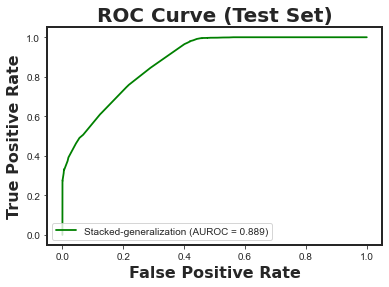

In [30]:
roc_auc(prob, y_test, 'Test Set')